In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. 
#* Take a look at the first 10 rows. 
#* Look at the last 5 rows. Do you see a problem?
#* Redo the read_csv() call to correct this issue - **do not** modify the original csv file.

In [3]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")

In [4]:
gdp_df[0:11]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [5]:
gdp_df[-5:]

,Country or Area,Year,Value,Value Footnotes
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,NaN,NaN,NaN,NaN
6869,footnoteSeqID,Footnote,NaN,NaN
6870,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [6]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv", skipfooter = 3, engine = 'python')

In [7]:
gdp_df[-5:]

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [8]:
#Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [9]:
gdp_df = gdp_df.rename(columns = {"Country or Area":"Country","Value":"GDP_Per_Capita"})

In [10]:
gdp_df

,Country,Year,GDP_Per_Capita,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
...,...,...,...,...
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN


In [11]:
gdp_df = gdp_df.drop(columns = "Value Footnotes")

In [12]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


In [13]:
#How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [14]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


In [15]:
gdp_df["Country"] = gdp_df["Country"].astype(str)

In [16]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


In [17]:
#Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [18]:
gdp_df["Year"].value_counts()

2013    238
2014    238
2016    238
2015    238
2017    238
2012    237
2018    237
2011    237
2009    236
2010    236
2007    235
2008    235
2006    235
2004    234
2005    234
2002    233
2003    233
2001    232
2019    231
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

In [19]:
#How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [20]:
gdp_df.nunique()

Country            238
Year                30
GDP_Per_Capita    6808
dtype: int64

In [21]:
#238 countries

In [22]:
gdp_df["Country"].value_counts()

Burundi                      30
Mexico                       30
Jamaica                      30
Lower middle income          30
OECD members                 30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

In [23]:
#The Countries with less data may be territories or newer countries

In [24]:
#Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [25]:
gdp_2014 = gdp_df[gdp_df["Year"] == 2014]

In [26]:
gdp_2014

,Country,Year,GDP_Per_Capita
5,Afghanistan,2014,2102.385234
23,Albania,2014,11623.866680
53,Algeria,2014,11512.705410
83,Angola,2014,8239.828837
113,Antigua and Barbuda,2014,18104.241470
...,...,...,...
6727,Vietnam,2014,6098.489609
6757,West Bank and Gaza,2014,5967.073437
6783,World,2014,15189.648510
6813,Zambia,2014,3450.046561


In [27]:
# Use `.describe()` to find the summary statistics for GDP per capita in 2014. 

In [28]:
gdp_2014["GDP_Per_Capita"].describe()

count       238.000000
mean      19766.710347
std       20983.869621
min         822.610458
25%        4753.110935
50%       12209.385755
75%       26803.610475
max      156514.133800
Name: GDP_Per_Capita, dtype: float64

In [29]:
#Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

<AxesSubplot:>

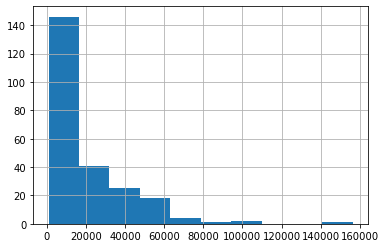

In [30]:
gdp_2014["GDP_Per_Capita"].hist(bins = 10)

In [31]:
#Histogram is right skewed

In [32]:
#Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [33]:
gdp_sorted = gdp_2014.sort_values("GDP_Per_Capita", ascending = False)

In [34]:
gdp_sorted

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133800
3691,Luxembourg,2014,108760.916000
5138,Qatar,2014,95578.416970
5464,Singapore,2014,87808.663160
561,Bermuda,2014,77361.104880
...,...,...,...
4528,Niger,2014,1127.615541
1422,Dem. Rep. Congo,2014,1029.790785
3781,Malawi,2014,1027.208496
827,Burundi,2014,886.235777


In [35]:
print(gdp_sorted[:5][["Country","GDP_Per_Capita"]])

               Country  GDP_Per_Capita
3721  Macao SAR, China    156514.13380
3691        Luxembourg    108760.91600
5138             Qatar     95578.41697
5464         Singapore     87808.66316
561            Bermuda     77361.10488


In [36]:
print(gdp_sorted[-5:][["Country","GDP_Per_Capita"]])

                       Country  GDP_Per_Capita
4528                     Niger     1127.615541
1422           Dem. Rep. Congo     1029.790785
3781                    Malawi     1027.208496
827                    Burundi      886.235777
1047  Central African Republic      822.610458


In [37]:
#Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2017 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named `gdp_pivoted`.

In [38]:
gdp_pivoted = gdp_df[gdp_df["Year"].isin([1990,2017])].pivot_table(values = 'GDP_Per_Capita', index = "Country", columns = "Year")

In [39]:
gdp_pivoted

Year,1990,2017
Country,,
Afghanistan,NaN,2058.383832
Albania,4842.734635,12811.759440
Algeria,8746.352901,11737.409350
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551680,19840.076120
...,...,...
Vietnam,1673.249634,7155.745829
West Bank and Gaza,NaN,6401.740891
World,9680.269697,16253.385520


In [40]:
gdp_pivoted = gdp_pivoted.dropna()

In [41]:
gdp_pivoted

Year,1990,2017
Country,,
Albania,4842.734635,12811.759440
Algeria,8746.352901,11737.409350
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551680,19840.076120
Arab World,9694.667544,14555.474920
...,...,...
Vanuatu,2888.309393,3116.645194
Vietnam,1673.249634,7155.745829
World,9680.269697,16253.385520


In [42]:
#Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [43]:
gdp_pivoted["Percent_Change"] = 100*(gdp_pivoted[2017]-gdp_pivoted[1990])/gdp_pivoted[1990]

<ipython-input-43-ef73c191b0e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_pivoted["Percent_Change"] = 100*(gdp_pivoted[2017]-gdp_pivoted[1990])/gdp_pivoted[1990]


In [44]:
gdp_pivoted

Year,1990,2017,Percent_Change
Country,,,
Albania,4842.734635,12811.759440,164.556297
Algeria,8746.352901,11737.409350,34.197756
Angola,5783.429064,7310.901738,26.411194
Antigua and Barbuda,15459.551680,19840.076120,28.335391
Arab World,9694.667544,14555.474920,50.138980
...,...,...,...
Vanuatu,2888.309393,3116.645194,7.905517
Vietnam,1673.249634,7155.745829,327.655604
World,9680.269697,16253.385520,67.902197


In [45]:
#How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [46]:
gdp_pivoted[gdp_pivoted["Percent_Change"] < 0].count()

Year
1990              17
2017              17
Percent_Change    17
dtype: int64

In [47]:
#17 countries experienced a negative percent change in GDP

In [48]:
#Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?

In [49]:
gdp_pivoted["Percent_Change"].max()

2068.4045623236652